# Beau Home House Prices Prediction Using Machine Learning
Strategy & Analytics Consultant: Dima Taher 

-----------------------------------------------------------

## Business Overview

### The Problem

Beau Home Properties is a new Real Estate Company that is just starting out in the State of California. They will be entering the business of investing in properties by buying and selling. They reached out to our Data Science team to build a value estimation system that can automatically deduce the value of the houses. This project will focus on building a machine learning model trained on existing housing features to predict house prices.

### The Goal

The goal is to identify the key features that influence house prices and after that will focus on building a machine learning model trained on those housing features to predict house prices. Three models will be built: Linear Regression, Random Forest, and XGBoost.

## The Datasets

The dataset used contained 20 columns and 42703 rows. In this analysis, 15 features were used apart from the sale price (target variable) which were all looked at in correlation to the house prices. 


## The Methods and Results


**Exploratory Data Analysis**

To start exploring the data I will first start off with importing the necessary libraries I will be needing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter, NullFormatter
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import r2_score

import xgboost as xgb
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

**House Data Info**

The dataframe that I will be working with is a houses data set, the first step is that I will read into the csv file

In [2]:
# Read the dataset into a data table using Pandas and show the first 5 rows
house_df = pd.read_csv('Data/house_data_set.csv')
house_df.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2519996.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,197193.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,207897.0


I will get additional information on the dataframe to see if it has any null values and the types of data

In [3]:
#Basic info on data
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_built           42703 non-null  int64  
 1   stories              42703 non-null  int64  
 2   num_bedrooms         42703 non-null  int64  
 3   full_bathrooms       42703 non-null  int64  
 4   half_bathrooms       42703 non-null  int64  
 5   livable_sqft         42703 non-null  int64  
 6   total_sqft           42703 non-null  int64  
 7   garage_type          42703 non-null  object 
 8   garage_sqft          42703 non-null  int64  
 9   carport_sqft         42703 non-null  int64  
 10  has_fireplace        42703 non-null  bool   
 11  has_pool             42703 non-null  bool   
 12  has_central_heating  42703 non-null  bool   
 13  has_central_cooling  42703 non-null  bool   
 14  house_number         42703 non-null  int64  
 15  street_name          42703 non-null 

This data set has 19 house features (not counting sale price) and 42703 data entries, I will be using those features in my model later on to help predict the house sale price.

In [4]:
house_df.describe()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,house_number,unit_number,zip_code,sale_price
count,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,3088.000000,42703.000000,4.270300e+04
mean,1990.993209,1.365759,3.209283,1.923659,0.527153,1987.758986,2127.155446,455.849800,41.656324,18211.767347,2027.395402,11030.991476,4.135071e+05
std,19.199987,0.513602,1.043396,0.759699,0.499268,846.766270,922.807342,243.453463,168.715867,27457.109993,1141.383770,573.576228,3.185497e+05
min,1852.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,5.000000,-4.000000,0.000000,0.000000,3.000000,10004.000000,6.260000e+02
25%,1980.000000,1.000000,3.000000,1.000000,0.000000,1380.000000,1466.000000,412.000000,0.000000,674.000000,1063.000000,10537.000000,2.708990e+05
50%,1994.000000,1.000000,3.000000,2.000000,1.000000,1808.000000,1937.000000,464.000000,0.000000,4530.000000,2033.000000,11071.000000,3.780010e+05
75%,2005.000000,2.000000,4.000000,2.000000,1.000000,2486.000000,2640.000000,606.000000,0.000000,24844.500000,2921.000000,11510.000000,4.976970e+05
max,2017.000000,4.000000,31.000000,8.000000,1.000000,12406.000000,15449.000000,8318.000000,9200.000000,99971.000000,3998.000000,11989.000000,2.104200e+07


In [5]:
#I will transpose the data so we can better see it  displayed
house_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_built,42703.0,1990.993209,19.199987,1852.0,1980.0,1994.0,2005.0,2017.0
stories,42703.0,1.365759,0.513602,0.0,1.0,1.0,2.0,4.0
num_bedrooms,42703.0,3.209283,1.043396,0.0,3.0,3.0,4.0,31.0
full_bathrooms,42703.0,1.923659,0.759699,0.0,1.0,2.0,2.0,8.0
half_bathrooms,42703.0,0.527153,0.499268,0.0,0.0,1.0,1.0,1.0
livable_sqft,42703.0,1987.758986,846.766270,-3.0,1380.0,1808.0,2486.0,12406.0
total_sqft,42703.0,2127.155446,922.807342,5.0,1466.0,1937.0,2640.0,15449.0
garage_sqft,42703.0,455.849800,243.453463,-4.0,412.0,464.0,606.0,8318.0
carport_sqft,42703.0,41.656324,168.715867,0.0,0.0,0.0,0.0,9200.0
house_number,42703.0,18211.767347,27457.109993,0.0,674.0,4530.0,24844.5,99971.0


In [6]:
house_df.corr()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,unit_number,zip_code,sale_price
year_built,1.000000,0.340048,0.354184,0.507460,0.018290,0.501600,0.441766,0.418244,-0.183255,0.133737,-0.023889,0.535366,0.566484,0.005649,-0.012783,0.034625,0.227948
stories,0.340048,1.000000,0.411178,0.386661,0.188167,0.402780,0.345969,0.263845,-0.164134,0.177420,-0.027474,0.145494,0.176515,-0.008927,0.035306,-0.020229,0.130693
num_bedrooms,0.354184,0.411178,1.000000,0.547654,0.090575,0.646047,0.599964,0.479839,-0.224600,0.310697,0.156539,0.179828,0.190266,-0.002300,0.029626,-0.068778,0.316768
full_bathrooms,0.507460,0.386661,0.547654,1.000000,-0.326024,0.718242,0.683580,0.419770,-0.071632,0.234325,0.169734,0.273856,0.310613,0.006440,-0.015574,0.012807,0.429947
half_bathrooms,0.018290,0.188167,0.090575,-0.326024,1.000000,0.103696,0.108050,0.154152,-0.155806,0.110508,0.046666,0.082710,0.060697,-0.006542,0.042163,-0.022586,0.094280
livable_sqft,0.501600,0.402780,0.646047,0.718242,0.103696,1.000000,0.975450,0.597781,-0.179945,0.321354,0.261967,0.257247,0.294371,0.001166,0.019502,-0.016870,0.627508
total_sqft,0.441766,0.345969,0.599964,0.683580,0.108050,0.975450,1.000000,0.586785,-0.180651,0.314783,0.290305,0.228405,0.266848,-0.000965,0.017894,-0.006054,0.660714
garage_sqft,0.418244,0.263845,0.479839,0.419770,0.154152,0.597781,0.586785,1.000000,-0.406683,0.415696,0.202434,0.240686,0.284199,-0.005734,0.041400,-0.046963,0.448928
carport_sqft,-0.183255,-0.164134,-0.224600,-0.071632,-0.155806,-0.179945,-0.180651,-0.406683,1.000000,-0.268507,-0.078099,-0.008206,-0.057609,0.001885,-0.025643,0.074363,-0.197384
has_fireplace,0.133737,0.177420,0.310697,0.234325,0.110508,0.321354,0.314783,0.415696,-0.268507,1.000000,0.229999,0.177342,0.190158,-0.008864,0.003104,-0.048129,0.275813


<AxesSubplot: >

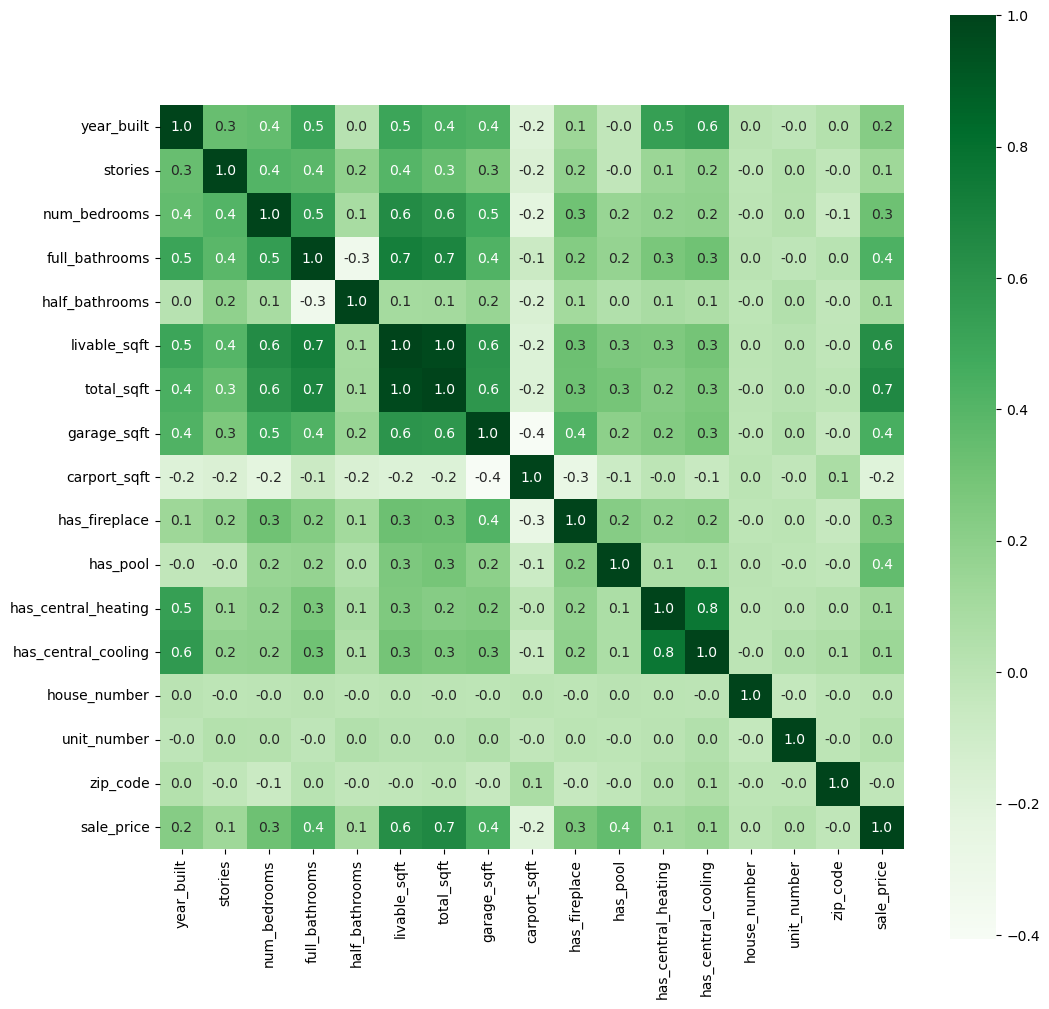

In [7]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(house_df.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

C:\Users\dtaher\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1010: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
C:\Users\dtaher\AppData\Local\Temp\ipykernel_28124\2144021531.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


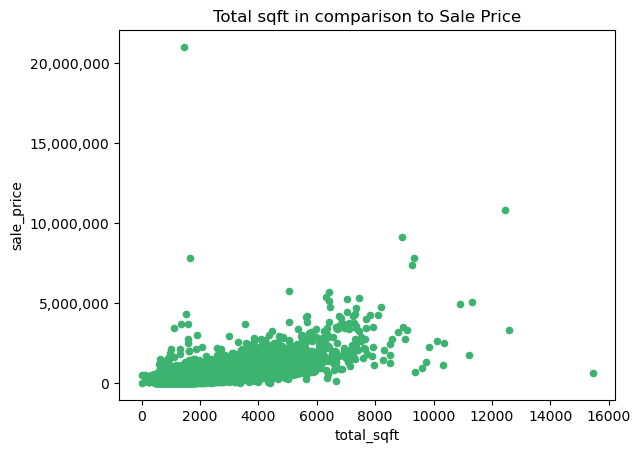

In [8]:
#total_sqft had the highest correlation, so I wanted to plot it
house_df.plot.scatter(x='total_sqft',y='sale_price',color='mediumseagreen');

# format the y label 1e7
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('Total sqft in comparison to Sale Price')
plt.show()

**Data Cleaning & Preparation**

In this section, I will start by cleaning the house dataframe before drawing any conclusions. It will help inspect the data better and get a more accurate general understanding of the data at hand.

**Step 1:** check  all columns in data frame

In [9]:
house_df.columns

Index(['year_built', 'stories', 'num_bedrooms', 'full_bathrooms',
       'half_bathrooms', 'livable_sqft', 'total_sqft', 'garage_type',
       'garage_sqft', 'carport_sqft', 'has_fireplace', 'has_pool',
       'has_central_heating', 'has_central_cooling', 'house_number',
       'street_name', 'unit_number', 'city', 'zip_code', 'sale_price'],
      dtype='object')

Now that I have seen all the columns and what features the dataframe entails, I want to select only the features that will be relative and useful to my model, in this next section I will be preparing the desired features.

**Step 2:** Remove unwanted columns

There are some features that will not be useful in my model therefore, I will delete the columns that I won't need. 

The house number isn't going to be useful to include in the model since it's not likely that anyone buys a house because the street number assigned to it, it's just a random number. So I will drop this field from the model. 
The same will go for unit number. As for street name, city, and zip code columns, the location of a house has a big influence on the value so we need to include at least some of this information in the model. However, these columns provide duplicate information. For example, if we know the zip code of a house, we already know what city it's in, so I don't need to include both city and zip code in my model. I will also delete street name since.

In [10]:
#There are 4 columns that I will remove since i will not included it in my model and has 0 correlation with our target
house_df.drop(['house_number', 'street_name', 'unit_number','zip_code'], axis = 1, inplace=True)
house_df.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,city,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,Hallfort,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,Hallfort,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,Lake Christinaport,2519996.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,Lake Christinaport,197193.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,Lake Christinaport,207897.0


**Step 3:** Check for any duplicates or null values

In [11]:
house_df.duplicated().value_counts()

False    42703
dtype: int64

no duplicates, so we're good to proceed

In [12]:
house_df.isnull().sum()

year_built             0
stories                0
num_bedrooms           0
full_bathrooms         0
half_bathrooms         0
livable_sqft           0
total_sqft             0
garage_type            0
garage_sqft            0
carport_sqft           0
has_fireplace          0
has_pool               0
has_central_heating    0
has_central_cooling    0
city                   0
sale_price             0
dtype: int64

no null values, we're good to proceed

In [13]:
#sorting by sale price to see the highest and lowest
house_df.sort_values("sale_price", ascending = False)

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,city,sale_price
14910,1974,1,2,2,0,1446,1438,none,0,298,False,False,True,False,Coletown,21041998.0
15714,2014,2,5,5,1,9806,12448,attached,1502,0,True,True,True,True,Lewishaven,10836004.0
32270,2013,2,5,4,1,7953,8934,attached,1344,0,True,False,True,True,Lewishaven,9141303.0
7338,1983,1,2,2,0,1438,1644,none,0,716,False,False,True,True,Lake Carolyn,7811999.0
20997,2002,1,5,4,1,8309,9340,attached,885,0,True,True,True,True,Lewishaven,7811996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25261,1966,1,1,1,0,475,469,none,0,378,False,False,True,False,East Janiceville,626.0
11844,1971,1,1,1,0,794,799,none,0,349,False,False,True,True,Jeffreyhaven,626.0
22447,1963,1,1,1,0,671,668,none,0,296,False,False,True,False,Jeffreyhaven,626.0
35927,1963,1,2,2,0,902,903,none,0,298,False,False,True,False,Jeffreyhaven,626.0


**Step 4:** Check if the features columns need any preparation

The columns with true and false values will be fine to use in my model since they'll be treated as one or zero automatically, so no extra work is needed to prepare it. 

**Numerical Variables:**

In [14]:
# list of numerical variables
numerical_features = [feature for feature in house_df.columns if house_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
house_df[numerical_features].head()

Number of numerical variables:  14


,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,sale_price
0,1978,1,4,1,1,1689,1859,508,0,True,False,True,True,270897.0
1,1958,1,3,1,1,1984,2002,462,0,True,False,True,True,302404.0
2,2002,1,3,2,0,1581,1578,0,625,False,False,True,True,2519996.0
3,2004,1,4,2,0,1829,2277,479,0,True,False,True,True,197193.0
4,2006,1,4,2,0,1580,1749,430,0,True,False,True,True,207897.0


Numerical variables are usually of 2 types: Continous variables and Discrete Variables

Discrete Variable: a variable whose value is obtained by counting.

Continuous Variable: a variable which can take an uncountable set of values or infinite set of values.

***Discrete Variables:***

In [15]:
discrete_feature=[feature for feature in numerical_features if len(house_df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 8


['stories',
 'num_bedrooms',
 'full_bathrooms',
 'half_bathrooms',
 'has_fireplace',
 'has_pool',
 'has_central_heating',
 'has_central_cooling']

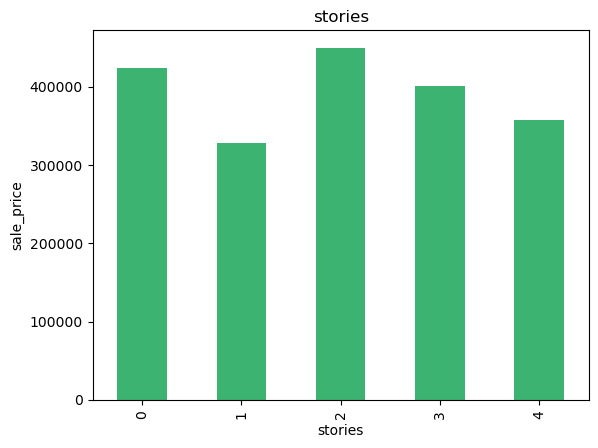

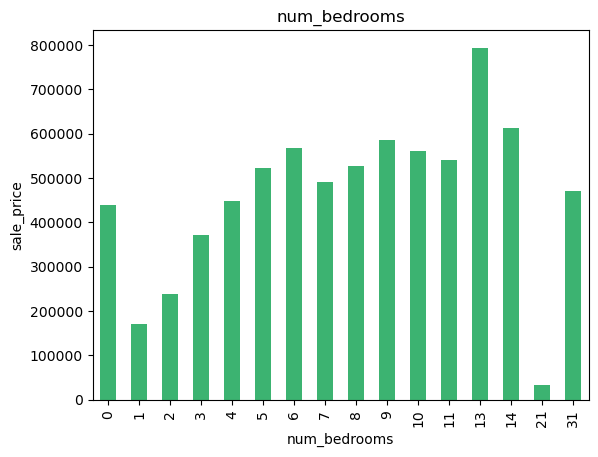

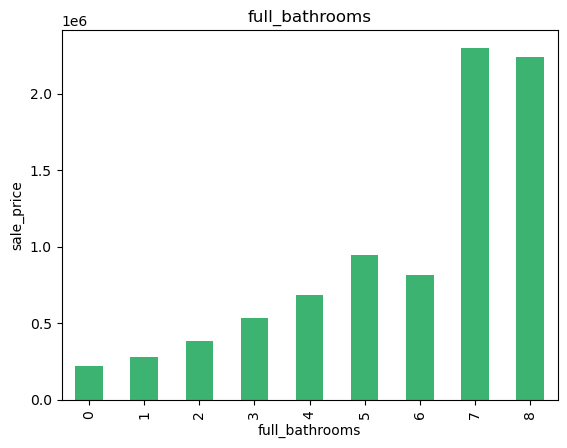

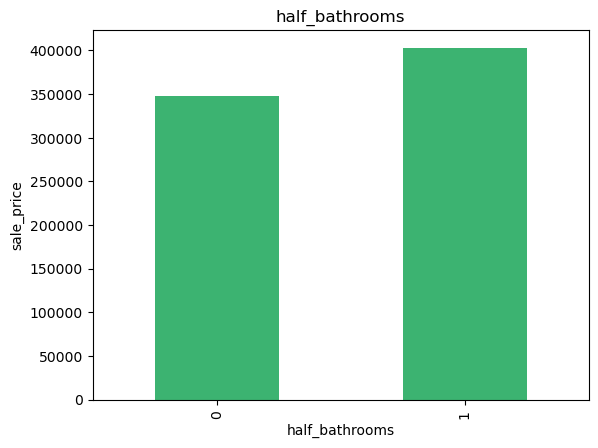

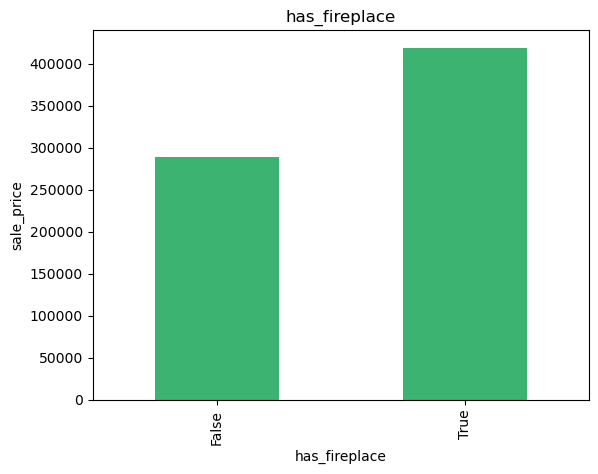

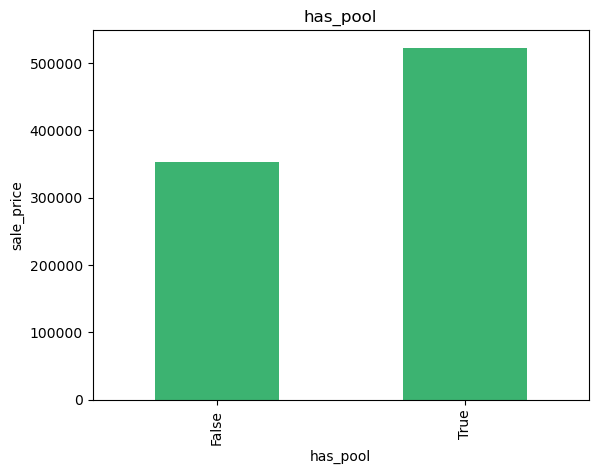

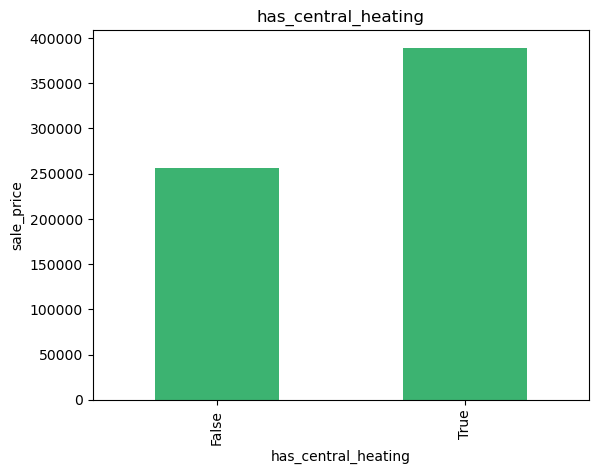

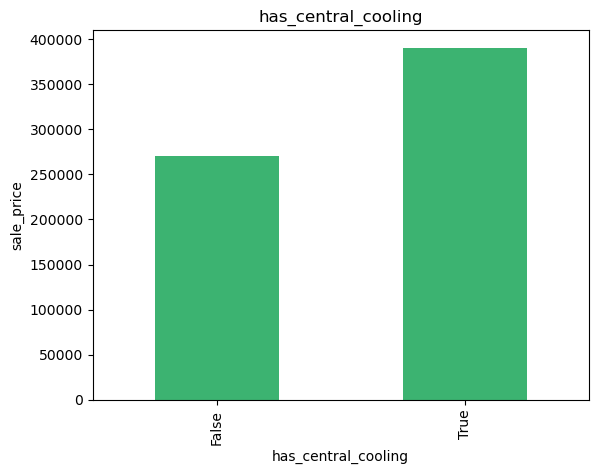

In [16]:
# Lets Find the realtionship between them and Sale Price

for feature in discrete_feature:
    data=house_df.copy()
    data.groupby(feature)['sale_price'].median().plot.bar(color='mediumseagreen')
    plt.xlabel(feature)
    plt.ylabel('sale_price')
    plt.title(feature)
    plt.show()

***Continuous Variables:***

In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 6


['year_built',
 'livable_sqft',
 'total_sqft',
 'garage_sqft',
 'carport_sqft',
 'sale_price']

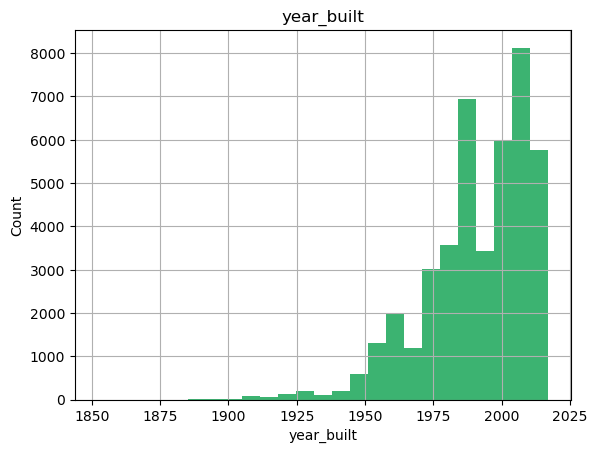

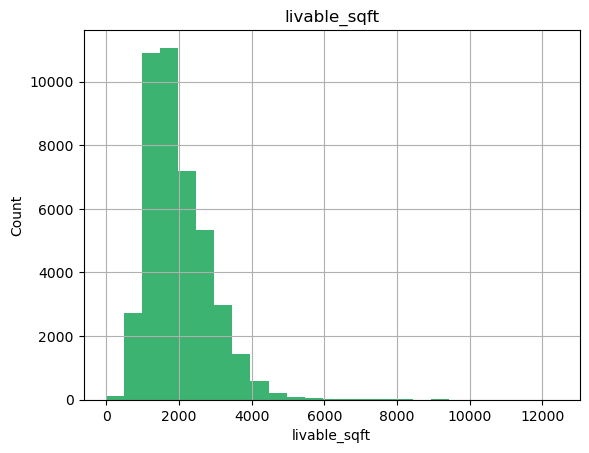

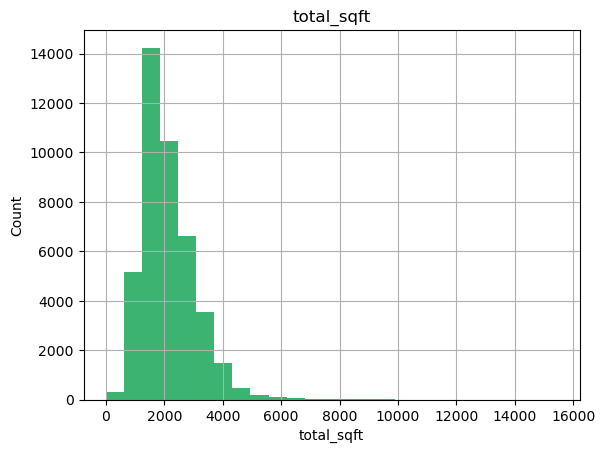

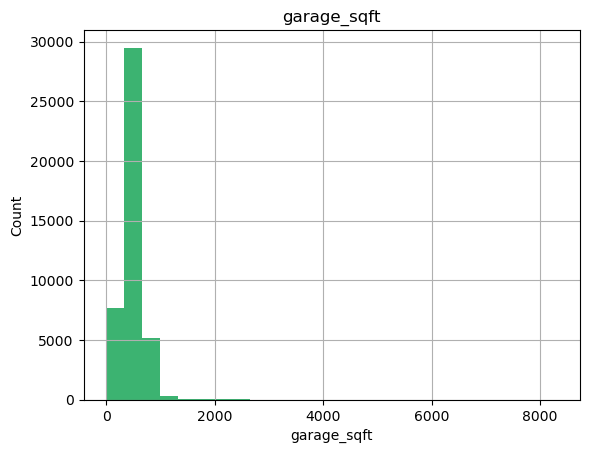

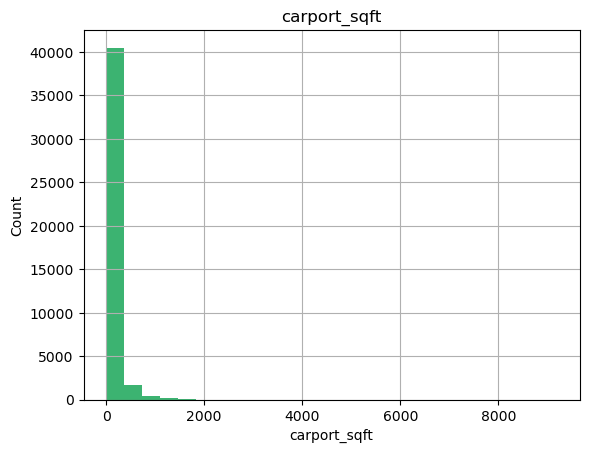

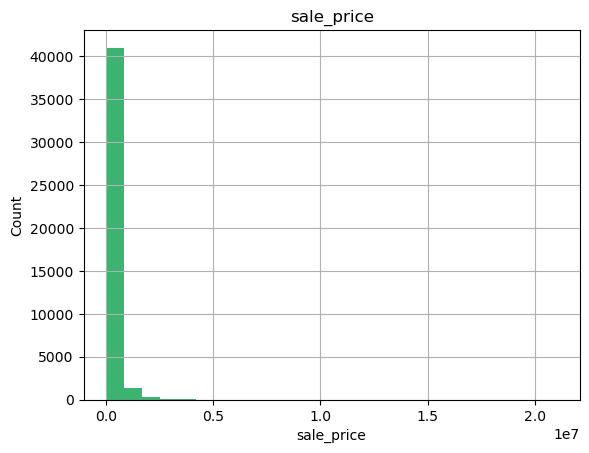

In [18]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=house_df.copy()
    data[feature].hist(bins=25, color='mediumseagreen')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


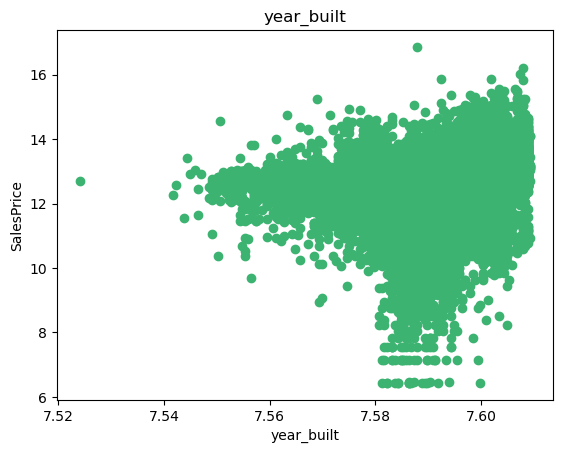

C:\Users\dtaher\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


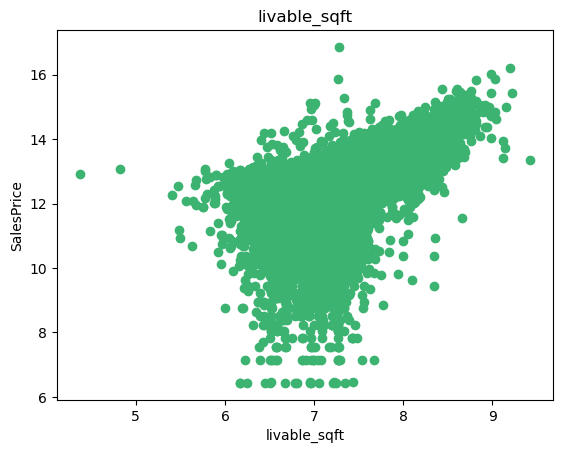

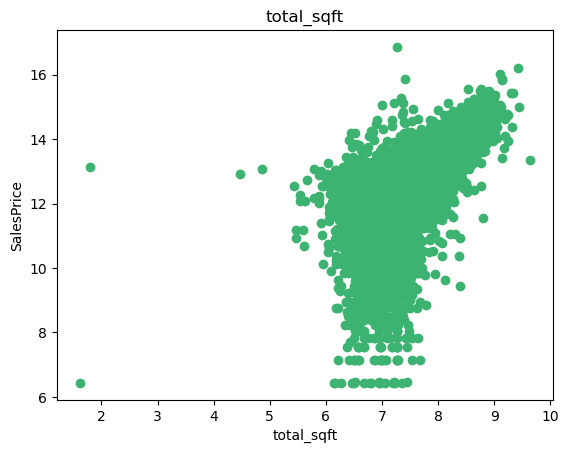

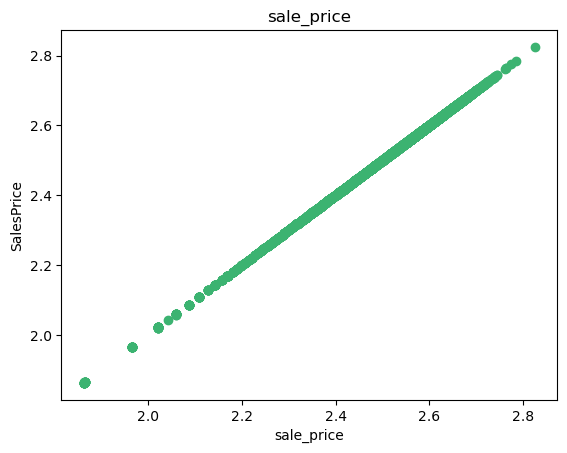

In [19]:
for feature in continuous_feature:
    data=house_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data["sale_price"]=np.log(data["sale_price"])
        plt.scatter(data[feature],data["sale_price"],color='mediumseagreen')
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

**Categorical Variables**:

I will use one-hot encoding to the columns with categorical values in order to use it in my model: the garage_type and city. One-Hot Encoding is the process of creating dummy variables for categorical variables. For every categorical feature, a new numerical variable is created.

In [20]:
categorical_features=[feature for feature in house_df.columns if data[feature].dtypes=='O']
print(categorical_features)

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(house_df[feature].unique())))

['garage_type', 'city']
The feature is garage_type and number of categories are 3
The feature is city and number of categories are 47


In [21]:
house_df['city'].value_counts()

Chadstad                4962
Coletown                3739
Jeffreyhaven            2981
North Erinville         2868
Port Andrealand         2669
Hallfort                2448
Lewishaven              2271
South Anthony           1849
Lake Jack               1831
Davidfort               1703
Lake Dariusborough      1441
West Ann                1397
East Lucas              1359
Port Jonathanborough    1344
Scottberg               1009
Lake Christinaport       833
East Amychester          792
Joshuafurt               745
West Lydia               709
Morrisport               654
Lake Carolyn             637
West Gregoryview         615
Wendybury                587
Amystad                  561
Port Adamtown            416
Richardport              297
Jenniferberg             275
Justinport               272
East Janiceville         248
Brownport                209
Clarkberg                174
West Gerald              151
West Brittanyview        120
East Justin              112
West Terrence 

In [22]:
house_df['garage_type'].value_counts()

attached    34079
none         5912
detached     2712
Name: garage_type, dtype: int64

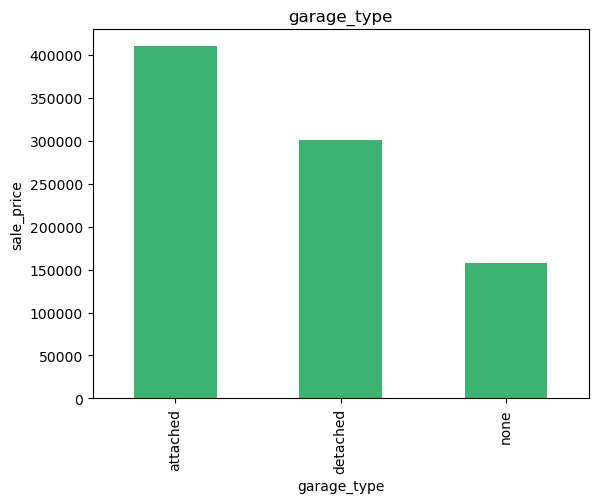

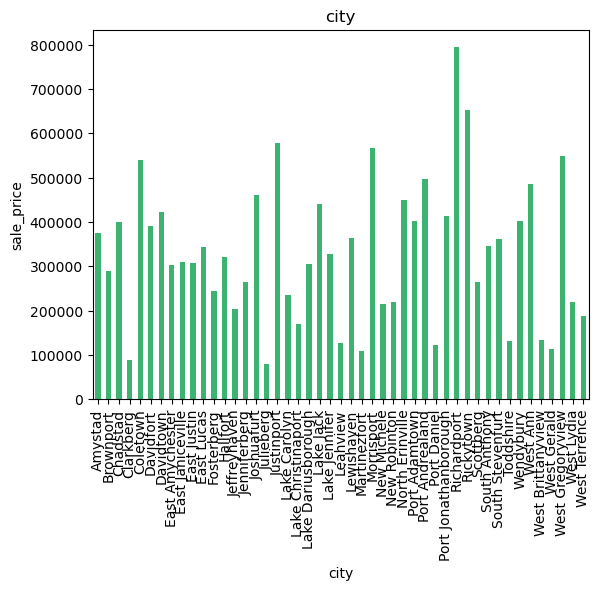

In [23]:
for feature in categorical_features:
    data=house_df.copy()
    data.groupby(feature)["sale_price"].median().plot.bar(color='mediumseagreen')
    plt.xlabel(feature)
    plt.ylabel("sale_price")
    plt.title(feature)
    plt.show()

C:\Users\dtaher\AppData\Local\Temp\ipykernel_28124\906618370.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


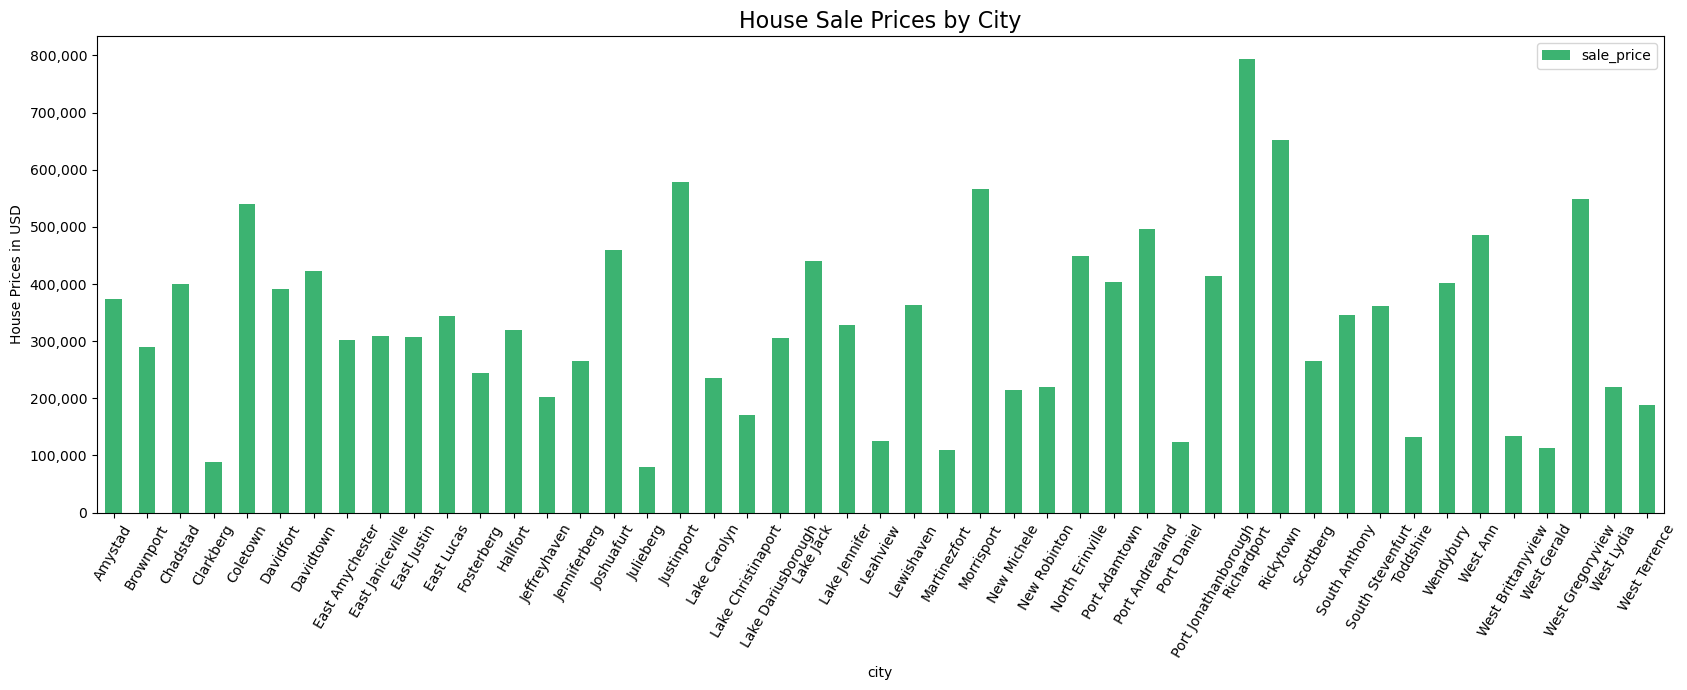

In [24]:
# A clearer plot than the one above
fig, ax = plt.subplots(figsize=(17,7))
house_df.groupby("city").median().plot.bar(y="sale_price", ax=ax, color='mediumseagreen');
# format the y label 1e6
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xticks(rotation=60)
plt.title('House Sale Prices by City', fontsize=16)
plt.ylabel('House Prices in USD')
plt.tight_layout()
plt.show()

**One-hot encoding of categorical variables**

I will now do one-hot encoding to the categorical variables so I can use it in my model

In [25]:
# Replace categorical data with one-hot encoded data
features_df = pd.get_dummies(house_df, columns=['garage_type', 'city'])
features_df

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,has_fireplace,...,city_South Anthony,city_South Stevenfurt,city_Toddshire,city_Wendybury,city_West Ann,city_West Brittanyview,city_West Gerald,city_West Gregoryview,city_West Lydia,city_West Terrence
0,1978,1,4,1,1,1689,1859,508,0,True,...,0,0,0,0,0,0,0,0,0,0
1,1958,1,3,1,1,1984,2002,462,0,True,...,0,0,0,0,0,0,0,0,0,0
2,2002,1,3,2,0,1581,1578,0,625,False,...,0,0,0,0,0,0,0,0,0,0
3,2004,1,4,2,0,1829,2277,479,0,True,...,0,0,0,0,0,0,0,0,0,0
4,2006,1,4,2,0,1580,1749,430,0,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42698,1982,1,1,1,0,591,627,0,200,False,...,0,0,0,0,0,0,0,0,0,0
42699,1983,1,1,1,0,592,624,0,204,False,...,0,0,0,0,0,0,0,0,0,0
42700,1983,1,1,1,0,594,618,0,197,False,...,0,0,0,0,0,0,0,0,0,0
42701,1981,1,3,2,0,1398,1401,401,0,False,...,0,0,0,0,0,0,0,0,0,0




The target variable that I'm trying to predict is the house's sale price. the different features in my data set will be utilized as the predictors of the target variable.

Therefore, I will need to separate the sale price column from the features data frame so the ML model doesn't see the sale price in the input data.

In [26]:
# Remove the sale price from the feature data
features_df.drop(['sale_price'], axis = 1, inplace=True)

**X and y Lists**

I will create X and y arrays.

X to represent the input features (house features, indepedent variables)

y to represent the expected output to predict (house sale price, dependent variable)

In [27]:
# the X array will be the contents of my features dataframe.
X = features_df

# the y array will be the sales price column from my original dataset
y = house_df['sale_price']

**Train & Test Data**

In this section, I will perform a train-test-split. When performing a train-test-split, it is important that the data is randomly split. Another thing to consider is just how big each training and testing set should be. I split the data into a training data set and a test data set. I will use Scikit-learn to do this in one linne of code. I will do the training set size at 70% and 30% for the testing set.

By training and testing, it will allow us to prove the accuracy of the model and prove that it actually learned general rules for predicting house prices.

In [28]:
#This command will shuffle all of our data so it's in a random order, and then split it into two groups. 
#The test size equals 0.3 parameter tells it we want to keep 70% of the data for training and 30%for testing. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
#viewing the lengths of the data
print(len(X_train), len(X_test), len(y_train), len(y_test))

29892 12811 29892 12811


# Modeling

In the following section, I will be creating a baseline model which will be a linear regression. 

A second model will be created using Random Forest. 

A final model will be created using XGBOOST.

The three models will be compared at the end. This will allow me to choose the best and most accurate model based on the results each model provided.

# Linear Regression Model
## Creating, Training, and Evaluating

For this machine learning model, I will be using a Linear Regression model.

I will import and create sklearn linearmodel LinearRegression object and fit the training dataset in it.

In [30]:
# Create a Linear regressor
lm = LinearRegression()
# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

**Linear Regression: Model prediction on train data**

I will look at the model prediction using the training data (X_train)

In [31]:
# Model prediction on train data
y_pred = lm.predict(X_train)
y_pred

array([341453.39892413, 274150.87377687, 312758.01697025, ...,
       207058.43662566, 634866.69336227, 313210.76705832])

**Model Evaluation**

𝑅^2 : is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable. it's a range between 0 and 1 where 1 perfectly fits the data.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y.

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

In [32]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


R^2: 0.5397858648435587
Adjusted R^2: 0.5388138422300796
MAE: 97143.50807473758
MSE: 50609971870.49514
RMSE: 224966.60167788272


The R2  is 0.53, This means that our model is explaining about 53% of the variance in house sale prices. The adjusted R2 has been adjusted for the number of predictors in the model but we can see here that they're both about the same.

The MAE value is telling us that our model is off by about 97,143 USD in a given prediction.

The RMSE value is telling us that our model is off by about 224,966 USD in a given prediction.




I want to visualize the differences between actual prices and predicted values

C:\Users\dtaher\AppData\Local\Temp\ipykernel_28124\4035391920.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\dtaher\AppData\Local\Temp\ipykernel_28124\4035391920.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


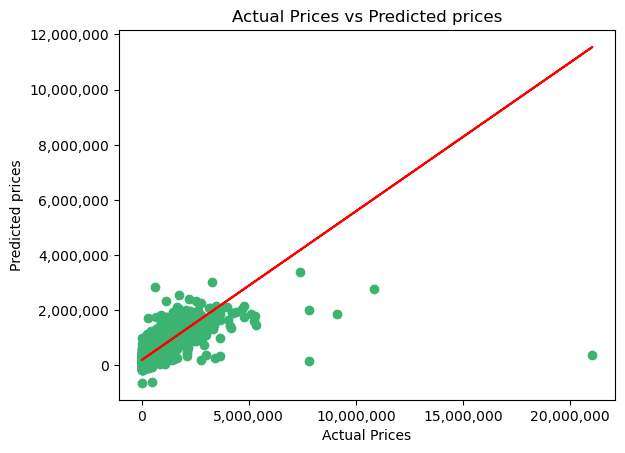

In [33]:
# Visualizing the differences between actual prices and predicted values
plt.plot(y_train, y_pred,'o', color='mediumseagreen')


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_train, y_pred, 1)

#use red as color for regression line
plt.plot(y_train, m*y_train+b, color='red')

# format the y label 1e6
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# format the y label 1e6
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

What we're getting is sort of a non-linear model

I want to check the residuals in my model, the residuals is the level of error in regression model, which is difference between the actual value of y and predicted value of y (regression line).

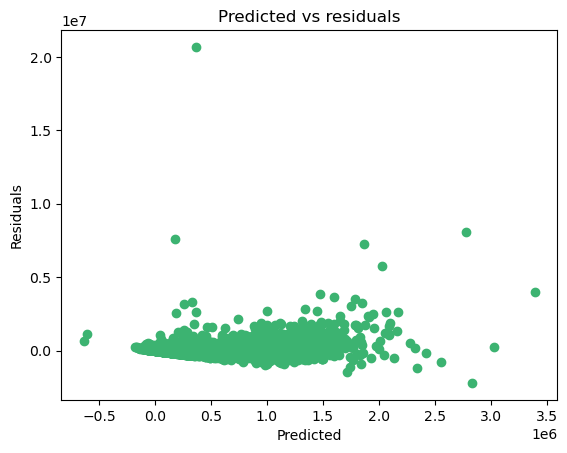

In [34]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred,color='mediumseagreen')
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

The error here is substantial

C:\Users\dtaher\AppData\Local\Temp\ipykernel_28124\3140813144.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


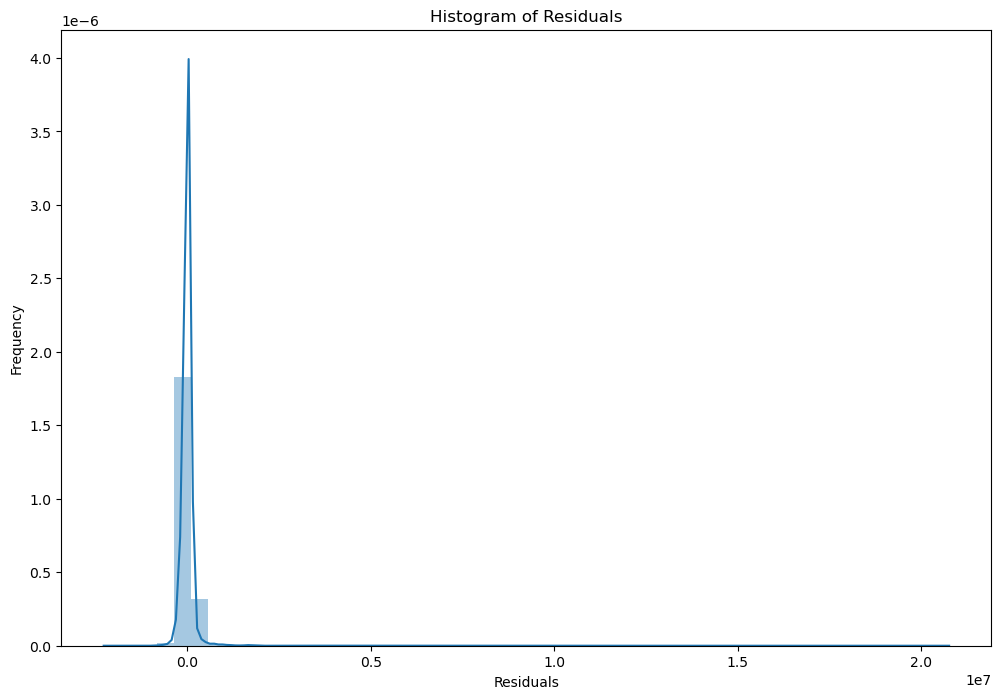

In [35]:
# Checking Normality of errors
plt.figure(figsize = (12,8))
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

it looks close to anormal distribution with a mean of 0, there is right skew which what we're observing on the scatter plot above, we're observing some outliers.

**Test Data Evaluation**

We will now predict and evaluate the testing data

In [36]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)
y_test_pred

array([258410.01653342, 371587.83901281, 445386.17462395, ...,
       355663.74772373, 776489.89812573, 792502.22716744])

In [37]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
adj_R2_linreg = 1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae_linreg = metrics.mean_absolute_error(y_test, y_test_pred)
mse_linreg = metrics.mean_squared_error(y_test, y_test_pred)
rmse_linreg = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', acc_linreg)
print('Adjusted R^2:',adj_R2_linreg)
print('MAE:',mae_linreg)
print('MSE:',mse_linreg)
print('RMSE:',rmse_linreg)

R^2: 0.6362739566305262
Adjusted R^2: 0.6344762990850428
MAE: 94602.43944736524
MSE: 29689568001.490467
RMSE: 172306.6104404891


The error values are better on the test data than our training data. 

With the test data the R2 increased by about 10%, This means that our model is explaining about 63% of the variance in house sale prices.

The MAE value is slightly better here, its telling us that our model is off by about 94,602 USD in a given prediction.

The RMSE value is significantly less than our training data, its telling us that our model is off by about 172,306 USD in a given prediction.

# Random Forest Model
## Creating, Training, and Evaluating 

The Linear Regression model that we built will be used as our baseline model. I will now create a random forest regressor and will eventually compare it with our previous model so that we pick the one with the best results.

In [38]:
# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

**Random Forest: Model prediction and evaluation on train data**

I will look at the model prediction using the training data (X_train)

In [39]:
# Model prediction on train data
y_pred = reg.predict(X_train)
y_pred

array([323359.1 , 239569.15, 353422.69, ..., 257367.17, 691079.19,
       399242.73])

In [40]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9617202170405477
Adjusted R^2: 0.9616393659500808
MAE: 23031.51841378072
MSE: 4209646316.3348494
RMSE: 64881.78724676787


The Random Forest got better results than the linear regression model.

R2 is at 96% which is a significant difference than the previous model.

MAE and RMSE have also significantly decreased which is so much better in our case. Now the MAE is telling us that our model is off by about 23,031 USD in a given prediction, and the RMSE is off by 64,881 USD in a given prediction.


I want to visualize the differences between actual prices and predicted values

C:\Users\dtaher\AppData\Local\Temp\ipykernel_28124\4035391920.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\dtaher\AppData\Local\Temp\ipykernel_28124\4035391920.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


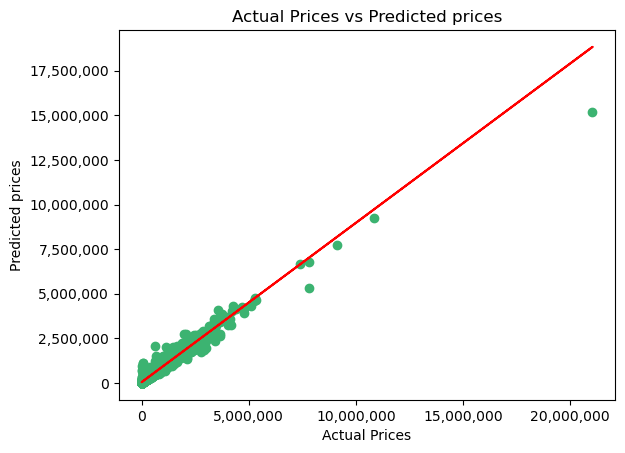

In [41]:
# Visualizing the differences between actual prices and predicted values
plt.plot(y_train, y_pred,'o', color='mediumseagreen')


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_train, y_pred, 1)

#use red as color for regression line
plt.plot(y_train, m*y_train+b, color='red')

# format the y label 1e6
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# format the y label 1e6
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

Visually, Random Forest is doing better here as well. It is more linear and we don't observe as much error.

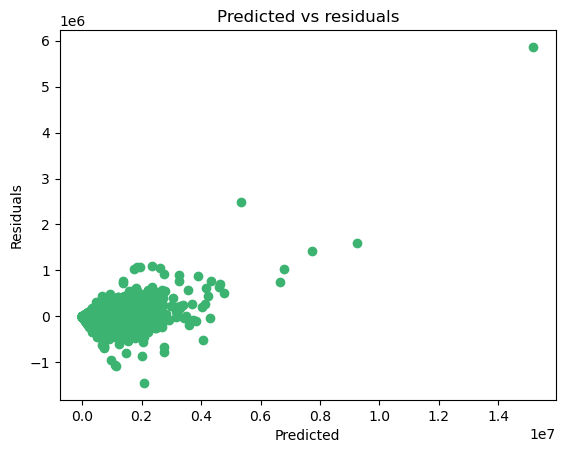

In [42]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred,color='mediumseagreen')
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In terms of residuals, we are observing less error, the maximum value here is about 7 million, while for the linear regression the maximum was about 20 million.

Random Forest is doing better here as well.

**Test Data Prediction and Evaluation**

We will now predict and evaluate the testing data

In [43]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
y_test_pred

array([ 65993.01, 509641.5 , 447773.38, ..., 456881.02, 674264.03,
       596122.61])

In [44]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
adj_R2_rf = 1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae_rf = metrics.mean_absolute_error(y_test, y_test_pred)
mse_rf = metrics.mean_squared_error(y_test, y_test_pred)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', acc_rf)
print('Adjusted R^2:',adj_R2_rf)
print('MAE:',mae_rf)
print('MSE:',mse_rf)
print('RMSE:',rmse_rf)

R^2: 0.7744834253536182
Adjusted R^2: 0.7733688459072605
MAE: 59265.33567297375
MSE: 18408056834.2082
RMSE: 135676.29429715493


The test data R2 went down by about 20% which tends to say that it's not robust but it is still performing very well at 77% which is still higher than the linear regression model.

MAE and RMSE have increased compared to the train data. 
Now the MAE is telling us that our model is off by about 59,265 USD in a given prediction, and the RMSE is off by 135,676 USD in a given prediction.


but in general the Random forest testing data metrics are still performing better than the testing data in the linear regression model.

# XGBOOST  Model
## Creating, Training, and Evaluating

This is the final model I will be running and after I will be able to determiine which model out of the three performed the best.

In [45]:
#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

**Model prediction and evaluation on train data**

In [46]:
# Model prediction on train data
y_pred = reg.predict(X_train)
y_pred

array([333543.53, 253370.34, 324494.97, ..., 264177.6 , 658201.7 ,
       417401.1 ], dtype=float32)

In [47]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9398881942315761
Adjusted R^2: 0.9397612315199155
MAE: 48961.41069741482
MSE: 6610524463.770415
RMSE: 81305.13184154131


The R2 is 0.93, This means that our model is explaining about 93% of the variance in house sale prices. The adjusted R2 is about the same.

The MAE value is telling us that our model is off by about 48,961 USD in a given prediction.

The RMSE value is telling us that our model is off by about 81,305 USD in a given prediction.

C:\Users\dtaher\AppData\Local\Temp\ipykernel_28124\4035391920.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\dtaher\AppData\Local\Temp\ipykernel_28124\4035391920.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


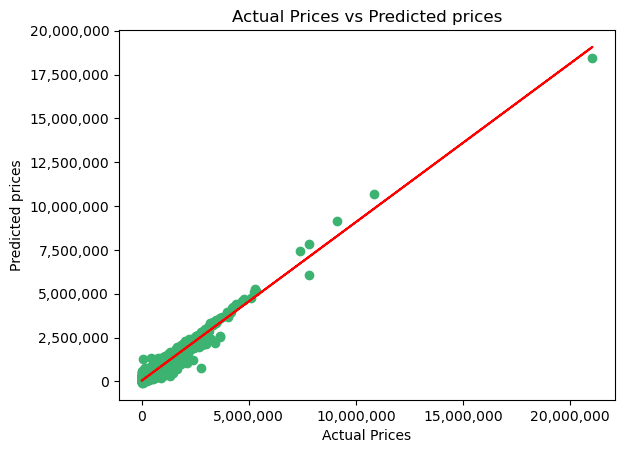

In [48]:
# Visualizing the differences between actual prices and predicted values
plt.plot(y_train, y_pred,'o', color='mediumseagreen')


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_train, y_pred, 1)

#use red as color for regression line
plt.plot(y_train, m*y_train+b, color='red')

# format the y label 1e6
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# format the y label 1e6
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

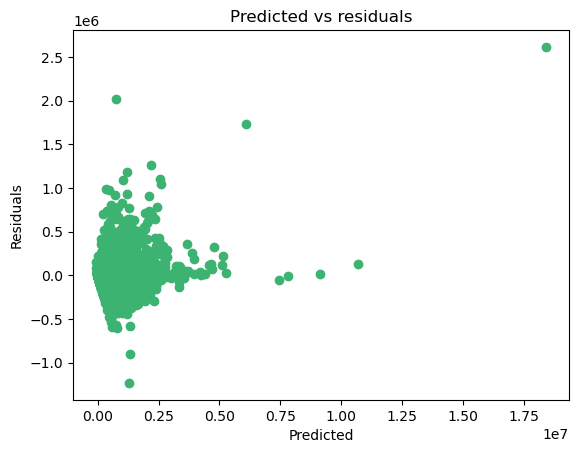

In [49]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred,color='mediumseagreen')
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

**Test Data Prediction and Evaluation**

We will now predict and evaluate the testing data

In [50]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)
y_test_pred

array([ 61427.324, 436466.44 , 463956.97 , ..., 422263.75 , 676038.5  ,
       635295.3  ], dtype=float32)

In [51]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
adj_R2_xgb = 1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae_xgb = metrics.mean_absolute_error(y_test, y_test_pred)
mse_xgb = metrics.mean_squared_error(y_test, y_test_pred)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', acc_xgb)
print('Adjusted R^2:',adj_R2_xgb)
print('MAE:',mae_xgb)
print('MSE:',mse_xgb)
print('RMSE:',rmse_xgb)

R^2: 0.7546187075507965
Adjusted R^2: 0.7534059499274891
MAE: 62197.712710157415
MSE: 20029537893.342033
RMSE: 141525.74993032904


Finally, the R2 decreased on the testing data compared to the training data. 
XGBoost R2 is at 75%, which means that our model is explaining about 75% of the variance in house sale prices. The adjusted R2 is about the same. 

Both XG Boost and Random Forest had very close scores but the Random Forest model had the best R2 score out of the 3 models.

The MAE value is telling us that our model is off by about 62,197 USD in a given prediction.

The RMSE value is telling us that our model is off by about 141,525 USD in a given prediction.



## Comparing the final three models

In [52]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100],
    'Adjusted R-squared Score': [adj_R2_linreg*100, adj_R2_rf*100, adj_R2_xgb*100],
    'MAE': [" %.2f " % mae_linreg, mae_rf, mae_xgb],
    'MSE': [" %.2f " % mse_linreg, mse_rf, mse_xgb],
    'RMSE': [" %.2f " % rmse_linreg, rmse_rf, rmse_xgb]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score,Adjusted R-squared Score,MAE,MSE,RMSE
1,Random Forest,77.448343,77.336885,59265.3,1.84081e+10,135676
2,XGBoost,75.461871,75.340595,62197.7,2.00295e+10,141526
0,Linear Regression,63.627396,63.447630,94602.44,29689568001.49,172306.61


In [53]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100],
    'MAE': [" %.2f " %mae_linreg, mae_rf, mae_xgb],
    'RMSE': [" %.2f " %rmse_linreg, rmse_rf, rmse_xgb]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score,MAE,RMSE
1,Random Forest,77.448343,59265.3,135676
2,XGBoost,75.461871,62197.7,141526
0,Linear Regression,63.627396,94602.44,172306.61


The main evaluation metrics I will focus on are the R2 and MAE.

Random Forest performed best in all metrics, the model is explaining about 77% of the variance in house sale prices vs. 75% for XGBoost and 63% for linear regression. The MAE value is telling us that the model is off by about 59,265 USD in a given prediction vs. 62,197 USD for XGBoost and 94,602 USD for Linear Regression. 

When we put all the models together and compare we can see that the Random Forest Model has the best accuracy results in all the metrics. 


## Business Recommendation:

The original business request was to build a value estimation model to predict house prices. After building and evaluating three different machine learning models, Random Forest provided the most accurate results. Therefore, it is recommended for Beau Home Properties to use the random forest model for their house price predictions.

## Limitations

There are some limitations that are worth mentiontining. The mean absolute error is telling us that our model is off by about 59,265 USD in a given prediction. Even though, the random forest model performed the best, this dollar amount is still relatively high because the model is basically missing the actual house price by about 59,265 dollars. This does introduce inaccuracy in our results. Future research with more valid data could provide additional insight. Also, hyperparameter tuning can be used to allow us to test different hyperparameter configurations when training our model. It can give optimized values for hyperparameters, which maximizes our model's predictive accuracy.

# Conclusion

Based on the outlined analyses above, it is recommended for Beau Home Properties to use the random forest model for their house price predictions. This model will provide Beau Home Properties with accurate results and will make the process of valuating house prices more efficient.

# Key References

Resources used:
- https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
- https://matplotlib.org/stable/gallery/color/named_colors.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
- https://cloud.google.com/ai-platform/training/docs/hyperparameter-tuning-overview
- https://www.statology.org/scatterplot-with-regression-line-python/